# Scikit-learn exercises 

In [73]:
# 0. EDA

# a)

import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas as pd

data = sns.load_dataset("mpg")
data.dropna(inplace=True)

data.info(), data.describe(), data.columns

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


(None,
               mpg   cylinders  displacement  horsepower       weight  \
 count  392.000000  392.000000    392.000000  392.000000   392.000000   
 mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
 std      7.805007    1.705783    104.644004   38.491160   849.402560   
 min      9.000000    3.000000     68.000000   46.000000  1613.000000   
 25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
 50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
 75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
 max     46.600000    8.000000    455.000000  230.000000  5140.000000   
 
        acceleration  model_year  
 count    392.000000  392.000000  
 mean      15.541327   75.979592  
 std        2.758864    3.683737  
 min        8.000000   70.000000  
 25%       13.775000   73.000000  
 50%       15.500000   76.000000  
 75%       17.025000   79.000000  
 max       24.800000   82.000000  ,
 Index(['mpg', 'cy

In [74]:
# b)

data[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration","model_year"]].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


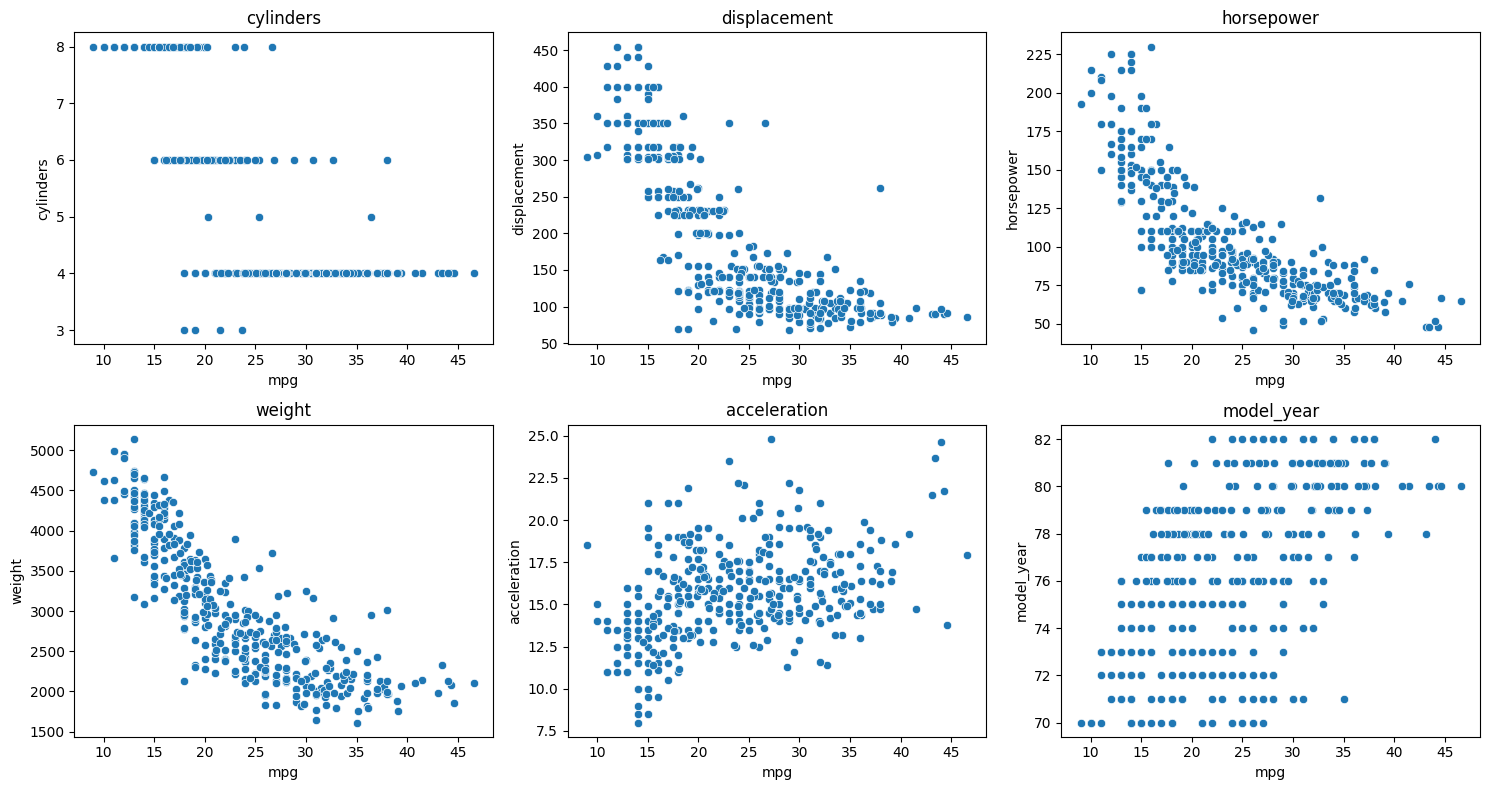

In [75]:
# c)

data = data[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]]


fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for col, ax in zip(data.columns[1:], axs.ravel()):
        sns.scatterplot(data=data, x="mpg", y=col, ax=ax)
        ax.set_title(col)

plt.tight_layout()

In [76]:
# 1. Train|test split

X = data.drop(["model_year", "mpg"], axis=1)
y = data["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 5), (79, 5), (313,), (79,))

In [77]:
# 2. Function for evaluation

model_svd = LinearRegression()
model_svd.fit(X_train, y_train)
y_hat_svd = model_svd.predict(X_test)
n = len(y_test)

MAE = np.divide(1, n) * np.sum(np.abs(y_test - y_hat_svd))
MSE = np.divide(1, n) * np.sum(np.square(y_test - y_hat_svd))
RMSE = np.sqrt(MSE)


print (f" MAE  {MAE}\n MSE  {MSE}\n RMSE {RMSE}\n")

 MAE  3.486131803336791
 MSE  17.939171976631272
 RMSE 4.235465969244856



In [78]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [93]:
# 3

X = data[["displacement", "weight", "model_year", "horsepower"]] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

degree = 4
regression_metrics = {}


def metrics(y_test, y_hat, n):
    MAE = np.divide(1, n) * np.sum(np.abs(y_test - y_hat))
    MSE = np.divide(1, n) * np.sum(np.square(y_test - y_hat))
    RMSE = np.sqrt(MSE)

    return (MAE, MSE, RMSE)


model_svd = LinearRegression()
model_svd.fit(X_train, y_train)
y_hat = model_svd.predict(X_test)
n = len(y_test)
regression_metrics["Linear Regression"] = metrics(y_test, y_hat, n)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_svd = LinearRegression()
model_svd.fit(X_train_scaled, y_train)
y_hat = model_svd.predict(X_test_scaled)
n = len(y_test)
regression_metrics["Linear Regression with features standardization"] = metrics(y_test, y_hat, n)


for i in range(1, degree+1):
    poly_features = PolynomialFeatures(i, include_bias=False)

    X_train_poly_features = poly_features.fit_transform(X_train)
    X_test_poly_features = poly_features.transform(X_test)

    model_svd.fit(X_train_poly_features, y_train)
    y_hat = model_svd.predict(X_test_poly_features)
    n = len(y_test)

    regression_metrics[f"Poly. features degree {i}"] = metrics(y_test, y_hat, n)


metrics_data = pd.DataFrame(regression_metrics, index=["MAE", "MSE", "RMSE"])


metrics_data

,Linear Regression,Linear Regression with features standardization,Poly. features degree 1,Poly. features degree 2,Poly. features degree 3,Poly. features degree 4
MAE,2.620850,2.620850,2.620850,2.128511,2.072846,1.991132
MSE,10.671287,10.671287,10.671287,8.417790,8.588146,8.138496
RMSE,3.266694,3.266694,3.266694,2.901343,2.930554,2.852805
